In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3dd6b317a88d078bb34065bd528ba8af


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ossora
Processing Record 2 of Set 1 | kieta
Processing Record 3 of Set 1 | palmares do sul
Processing Record 4 of Set 1 | zhaotong
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | coahuayana
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | tambacounda
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | vanimo
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | vryburg
Processing Record 13 of Set 1 | evensk
Processing Record 14 of Set 1 | utiroa
City not found. Skipping...
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | kibi
Processing Record 18 of Set 1 | sulejowek
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | taola

City not found. Skipping...
Processing Record 39 of Set 4 | cururupu
Processing Record 40 of Set 4 | murray bridge
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | belmonte
Processing Record 43 of Set 4 | skibbereen
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | maguri-racatau
City not found. Skipping...
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | vengerovo
Processing Record 49 of Set 4 | atambua
Processing Record 50 of Set 4 | samarai
Processing Record 1 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 2 of Set 5 | mackay
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | barawe
City not found. Skipping...
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | collie
Processing Record 7 of Set 5 | kuche
City not found. Skipping...
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | geraldton
P

Processing Record 27 of Set 8 | uenohara
Processing Record 28 of Set 8 | sisimiut
Processing Record 29 of Set 8 | kizukuri
Processing Record 30 of Set 8 | meiganga
Processing Record 31 of Set 8 | channel-port aux basques
Processing Record 32 of Set 8 | bonthe
Processing Record 33 of Set 8 | oistins
Processing Record 34 of Set 8 | warqla
City not found. Skipping...
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | hattiesburg
Processing Record 37 of Set 8 | ramhormoz
Processing Record 38 of Set 8 | illapel
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | solnechnyy
Processing Record 41 of Set 8 | labutta
City not found. Skipping...
Processing Record 42 of Set 8 | thinadhoo
Processing Record 43 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 8 | doda
Processing Record 45 of Set 8 | chagda
City not found. Skipping...
Processing Record 46 of Set 8 | nynashamn
Processing Record 47 of Set 8 | westport
Pr

Processing Record 14 of Set 12 | paralimni
Processing Record 15 of Set 12 | golfito
Processing Record 16 of Set 12 | rawson
Processing Record 17 of Set 12 | strezhevoy
Processing Record 18 of Set 12 | umm kaddadah
Processing Record 19 of Set 12 | port-gentil
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | lompoc
Processing Record 22 of Set 12 | ystad
Processing Record 23 of Set 12 | jinka
Processing Record 24 of Set 12 | port macquarie
Processing Record 25 of Set 12 | noyabrsk
Processing Record 26 of Set 12 | yashkul
Processing Record 27 of Set 12 | camacha
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | skjervoy
Processing Record 30 of Set 12 | owando
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | le port
Processing Record 33 of Set 12 | alofi
Processing Record 34 of Set 12 | amposta
Processing Record 35 of Set 12 | karonga
Processing Record 36 of Set 12 | locri
Processing Record 37 of Set 12 | lorengau
P

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ossora,59.2353,163.0719,28.36,95,100,10.65,RU,2022-02-02 01:01:36
1,Kieta,-6.2167,155.6333,84.78,72,70,10.31,PG,2022-02-02 01:01:37
2,Palmares Do Sul,-30.2578,-50.5097,70.41,76,0,11.03,BR,2022-02-02 01:01:37
3,Zhaotong,27.3167,103.7167,24.87,93,89,4.12,CN,2022-02-02 01:01:37
4,Avarua,-21.2078,-159.7750,82.45,78,20,12.66,CK,2022-02-02 01:01:38
5,Coahuayana,18.7333,-103.6833,71.92,63,0,2.06,MX,2022-02-02 01:01:38
6,Barrow,71.2906,-156.7887,-23.42,100,22,6.33,US,2022-02-02 01:00:02
7,Tambacounda,13.7539,-13.7586,81.36,12,7,8.66,SN,2022-02-02 01:01:39
8,Albany,42.6001,-73.9662,28.98,66,100,1.99,US,2022-02-02 00:52:02
9,Vanimo,-2.6741,141.3028,83.71,69,77,2.21,PG,2022-02-02 00:54:44


In [12]:
city_data_new = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ossora,RU,2022-02-02 01:01:36,59.2353,163.0719,28.36,95,100,10.65
1,Kieta,PG,2022-02-02 01:01:37,-6.2167,155.6333,84.78,72,70,10.31
2,Palmares Do Sul,BR,2022-02-02 01:01:37,-30.2578,-50.5097,70.41,76,0,11.03
3,Zhaotong,CN,2022-02-02 01:01:37,27.3167,103.7167,24.87,93,89,4.12
4,Avarua,CK,2022-02-02 01:01:38,-21.2078,-159.7750,82.45,78,20,12.66
...,...,...,...,...,...,...,...,...,...
559,Pisco,PE,2022-02-02 01:17:38,-13.7000,-76.2167,69.85,73,0,17.27
560,Dongsheng,CN,2022-02-02 01:17:39,39.8161,109.9776,11.01,31,0,5.53
561,Qaqortoq,GL,2022-02-02 01:17:40,60.7167,-46.0333,14.50,89,8,3.38
562,Waipawa,NZ,2022-02-02 01:17:40,-41.4122,175.5153,75.83,42,40,9.80


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

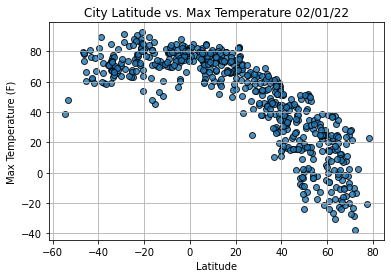

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

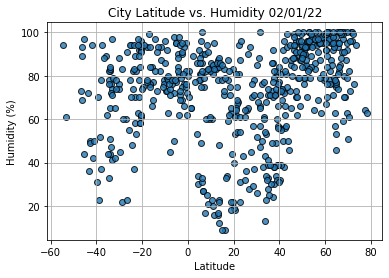

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

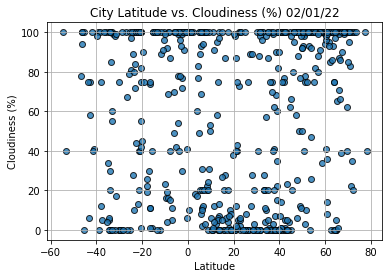

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

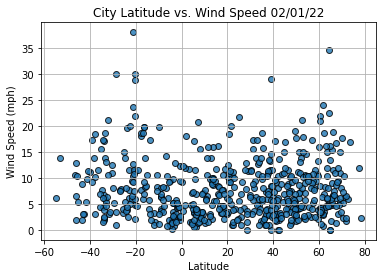

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-02-02 01:01:41
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    78.35
Humidity                       70
Cloudiness                     72
Wind Speed                   6.04
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
559    False
560     True
561     True
562    False
563    False
Name: Lat, Length: 564, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ossora,RU,2022-02-02 01:01:36,59.2353,163.0719,28.36,95,100,10.65
3,Zhaotong,CN,2022-02-02 01:01:37,27.3167,103.7167,24.87,93,89,4.12
5,Coahuayana,MX,2022-02-02 01:01:38,18.7333,-103.6833,71.92,63,0,2.06
6,Barrow,US,2022-02-02 01:00:02,71.2906,-156.7887,-23.42,100,22,6.33
7,Tambacounda,SN,2022-02-02 01:01:39,13.7539,-13.7586,81.36,12,7,8.66
...,...,...,...,...,...,...,...,...,...
556,Aksarka,RU,2022-02-02 01:17:37,66.5606,67.7975,-19.55,100,86,6.73
557,Haines Junction,CA,2022-02-02 01:15:31,60.7522,-137.5108,-18.45,76,100,1.14
558,Dire Dawa,ET,2022-02-02 01:17:38,9.5931,41.8661,63.10,61,50,1.95
560,Dongsheng,CN,2022-02-02 01:17:39,39.8161,109.9776,11.01,31,0,5.53


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ossora,RU,2022-02-02 01:01:36,59.2353,163.0719,28.36,95,100,10.65
3,Zhaotong,CN,2022-02-02 01:01:37,27.3167,103.7167,24.87,93,89,4.12
5,Coahuayana,MX,2022-02-02 01:01:38,18.7333,-103.6833,71.92,63,0,2.06
6,Barrow,US,2022-02-02 01:00:02,71.2906,-156.7887,-23.42,100,22,6.33
7,Tambacounda,SN,2022-02-02 01:01:39,13.7539,-13.7586,81.36,12,7,8.66


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

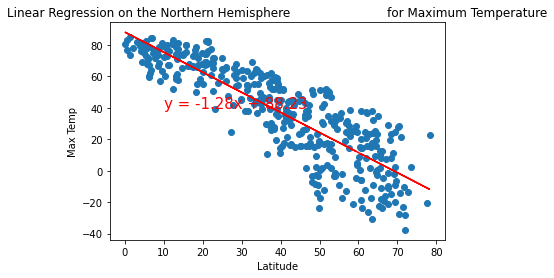

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

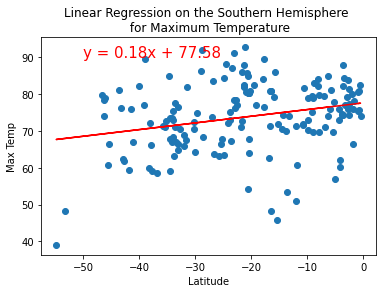

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

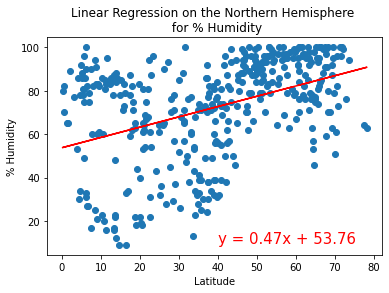

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

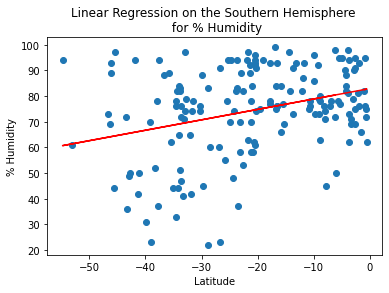

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

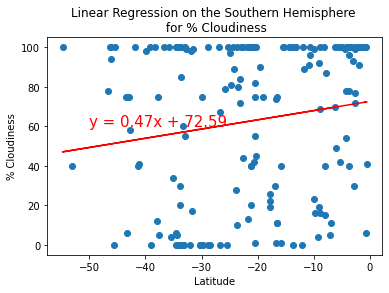

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

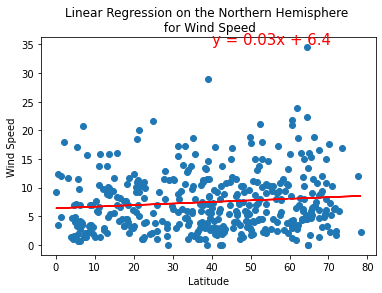

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

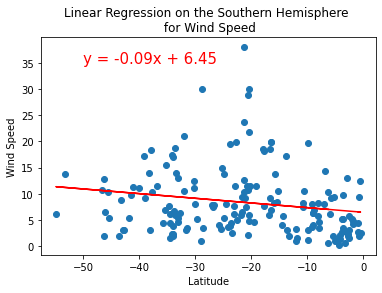

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))